# Install dependencies before reproducing results

In [43]:
# !pip install -r requirements.txt

# Exploratory Analysis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [48]:
ori_df = pd.read_csv("6M-0K-99K.users.dataset.public.csv")
ori_df.shape

(98913, 24)

In [40]:
ori_df.describe(include="all")

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
count,9.891300e+04,98913,98913,98913,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913,98913.000000,98913,98913,98913,98913,98913,98913.000000,98913.000000,98913.000000,98913.000000,98913
unique,NaN,1,200,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,2,2,2,2,NaN,NaN,NaN,NaN,199
top,NaN,user,France,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,mrs,False,False,False,True,NaN,NaN,NaN,NaN,fr
freq,NaN,98913,25135,51564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76121,NaN,75684,72739,94094,77386,97018,NaN,NaN,NaN,NaN,25135
mean,-6.692039e+15,NaN,NaN,NaN,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,NaN,1.773993,NaN,NaN,NaN,NaN,NaN,655.732310,3063.771870,102.125583,8.510424,NaN
std,5.330807e+18,NaN,NaN,NaN,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,NaN,0.428679,NaN,NaN,NaN,NaN,NaN,7407.430369,168.298621,5.609735,0.467863,NaN
min,-9.223101e+18,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,11.000000,2852.000000,95.070000,7.920000,NaN
25%,-4.622895e+18,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,572.000000,2857.000000,95.230000,7.940000,NaN
50%,-1.337989e+15,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,694.000000,3196.000000,106.530000,8.880000,NaN
75%,4.616388e+18,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,702.000000,3201.000000,106.700000,8.890000,NaN


In [43]:
# No missing data found
ori_df.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

In [103]:
# Removing duplicated covariates from imported data
df = ori_df.copy()
df.drop(['identifierHash','type','country','civilityGenderId','seniority','seniorityAsMonths'], axis=1, inplace=True)
df = df[['countryCode','language','gender','civilityTitle','socialNbFollowers','socialNbFollows','socialProductsLiked','productsListed','productsWished','productsSold', 
         'productsPassRate','productsBought','hasAnyApp','hasAndroidApp','hasIosApp','hasProfilePicture','daysSinceLastLogin','seniorityAsYears']]
df.describe(include='all')

,countryCode,language,gender,civilityTitle,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsWished,productsSold,productsPassRate,productsBought,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniorityAsYears
count,98913,98913,98913,98913,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913,98913,98913,98913,98913.000000,98913.000000
unique,199,5,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN
top,fr,en,F,mrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True,NaN,NaN
freq,25135,51564,76121,75684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72739,94094,77386,97018,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.432269,8.425677,4.420743,0.093304,1.562595,0.121592,0.812303,0.171929,NaN,NaN,NaN,NaN,655.732310,8.510424
std,NaN,NaN,NaN,NaN,3.882383,52.839572,181.030569,2.050144,25.192793,2.126895,8.500205,2.332266,NaN,NaN,NaN,NaN,7407.430369,0.467863
min,NaN,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,11.000000,7.920000
25%,NaN,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,572.000000,7.940000
50%,NaN,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,694.000000,8.880000
75%,NaN,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,702.000000,8.890000


In [104]:
df.describe()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsWished,productsSold,productsPassRate,productsBought,daysSinceLastLogin,seniorityAsYears
count,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,3.432269,8.425677,4.420743,0.093304,1.562595,0.121592,0.812303,0.171929,655.732310,8.510424
std,3.882383,52.839572,181.030569,2.050144,25.192793,2.126895,8.500205,2.332266,7407.430369,0.467863
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,7.920000
25%,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,572.000000,7.940000
50%,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,694.000000,8.880000
75%,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,702.000000,8.890000
max,744.000000,13764.000000,51671.000000,244.000000,2635.000000,174.000000,100.000000,405.000000,737028.000000,8.900000


# Identifying and Removing Outliers

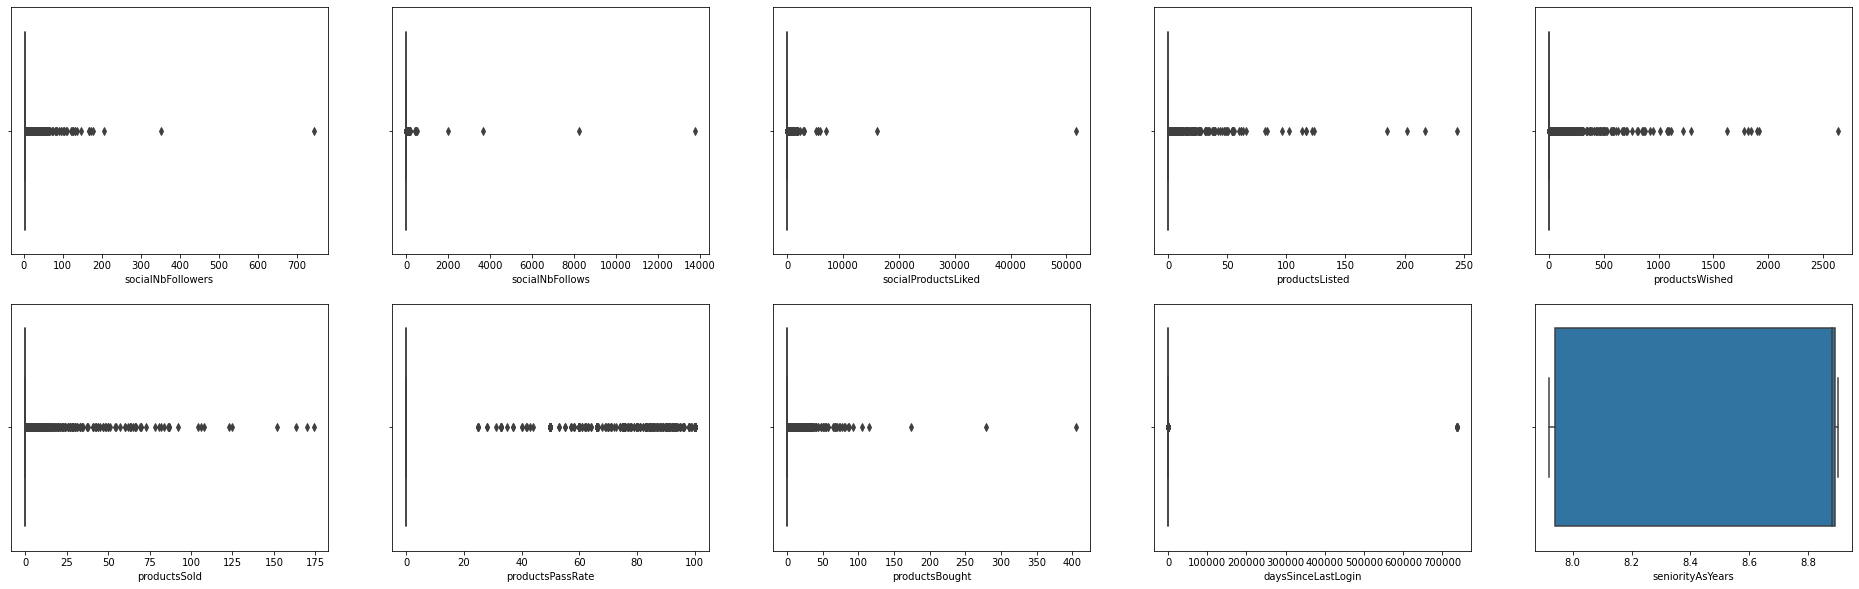

In [112]:
FIG = plt.figure(figsize=(33, 10))

FIG.add_subplot(251)
sns.boxplot(x='socialNbFollowers', data=df)

FIG.add_subplot(252)
sns.boxplot(x='socialNbFollows', data=df)

FIG.add_subplot(253)
sns.boxplot(x='socialProductsLiked', data=df)

FIG.add_subplot(254)
sns.boxplot(x='productsListed', data=df)

FIG.add_subplot(255)
sns.boxplot(x='productsWished', data=df)

FIG.add_subplot(256)
sns.boxplot(x='productsSold', data=df)

FIG.add_subplot(257)
sns.boxplot(x='productsPassRate', data=df)

FIG.add_subplot(258)
sns.boxplot(x='productsBought', data=df)

FIG.add_subplot(259)
sns.boxplot(x='daysSinceLastLogin', data=df)

FIG.add_subplot(2,5,10)
sns.boxplot(x='seniorityAsYears', data=df)

plt.show()

In [113]:
df.sort_values(by='daysSinceLastLogin',ascending=False).head(15)

,countryCode,language,gender,civilityTitle,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsWished,productsSold,productsPassRate,productsBought,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniorityAsYears
89086,au,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89093,gb,en,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,737028,7.92
89084,us,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89089,us,en,F,mrs,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89083,au,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89088,es,es,F,mrs,3,8,0,0,0,0,0.0,0,True,True,False,True,737028,7.92
87544,se,en,F,mrs,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89090,us,en,M,mr,3,8,0,0,0,0,0.0,0,False,False,False,True,737028,7.92
89091,gb,en,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,737028,7.92
89087,it,it,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,737028,7.92


In [114]:
# Remove outlier data found from 'daysSinceLastLogin' covariate
df_clean = df[df['daysSinceLastLogin'] != 737028]

<AxesSubplot:xlabel='daysSinceLastLogin'>

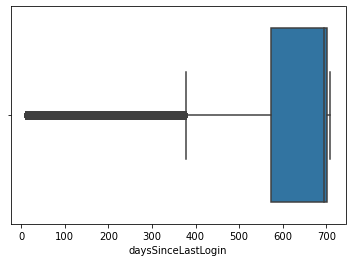

In [116]:
sns.boxplot(x='daysSinceLastLogin', data=df_clean)

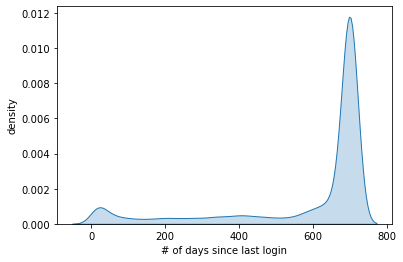

In [108]:
# plt.title(f"User retention: how users drop out over time [all user segments]")
plt.xlabel("# of days since last login")
plt.ylabel("density")
sns.kdeplot(np.array(df_clean['daysSinceLastLogin']), shade=True)
plt.show()

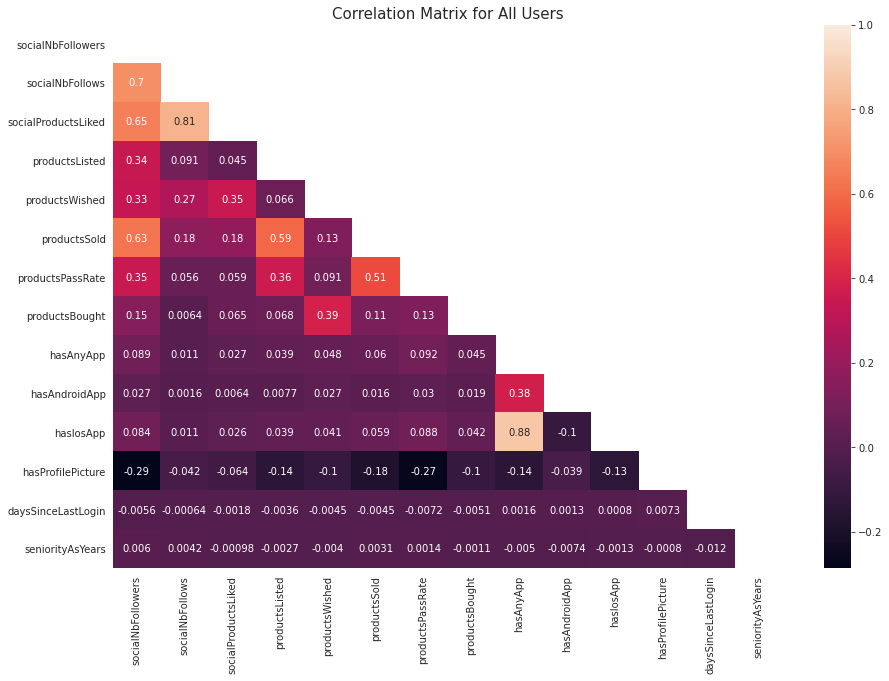

In [60]:
# corr = df.corr()
# sns.heatmap(corr, annot=True, square=True)
# plt.yticks(rotation=0)
# plt.show()

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, annot=True, mask=mask, vmax=1, square=False)
plt.title(f'Correlation Matrix for All Users', fontsize=15)
plt.show()

In [37]:
# Remove outlier data for 'daysSinceLastLogin'
test = df[df['daysSinceLastLogin'] != 737028]

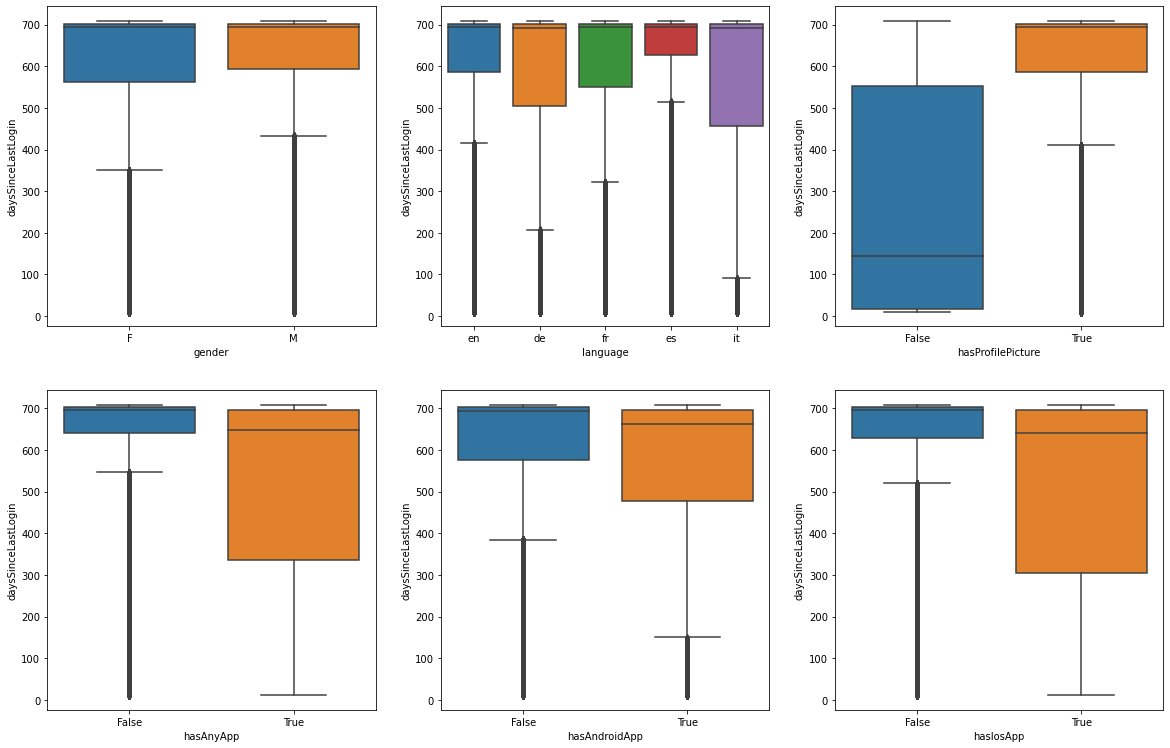

In [96]:
FIG = plt.figure(figsize=(20, 20))

FIG.add_subplot(331)
sns.boxplot(x='gender', y='daysSinceLastLogin', data=test)

FIG.add_subplot(332)
sns.boxplot(x='language', y='daysSinceLastLogin', data=test)

FIG.add_subplot(333)
sns.boxplot(x='hasProfilePicture', y='daysSinceLastLogin', data=test)

FIG.add_subplot(334)
sns.boxplot(x='hasAnyApp', y='daysSinceLastLogin', data=test)

FIG.add_subplot(335)
sns.boxplot(x='hasAndroidApp', y='daysSinceLastLogin', data=test)

FIG.add_subplot(336)
sns.boxplot(x='hasIosApp', y='daysSinceLastLogin', data=test)

plt.show()

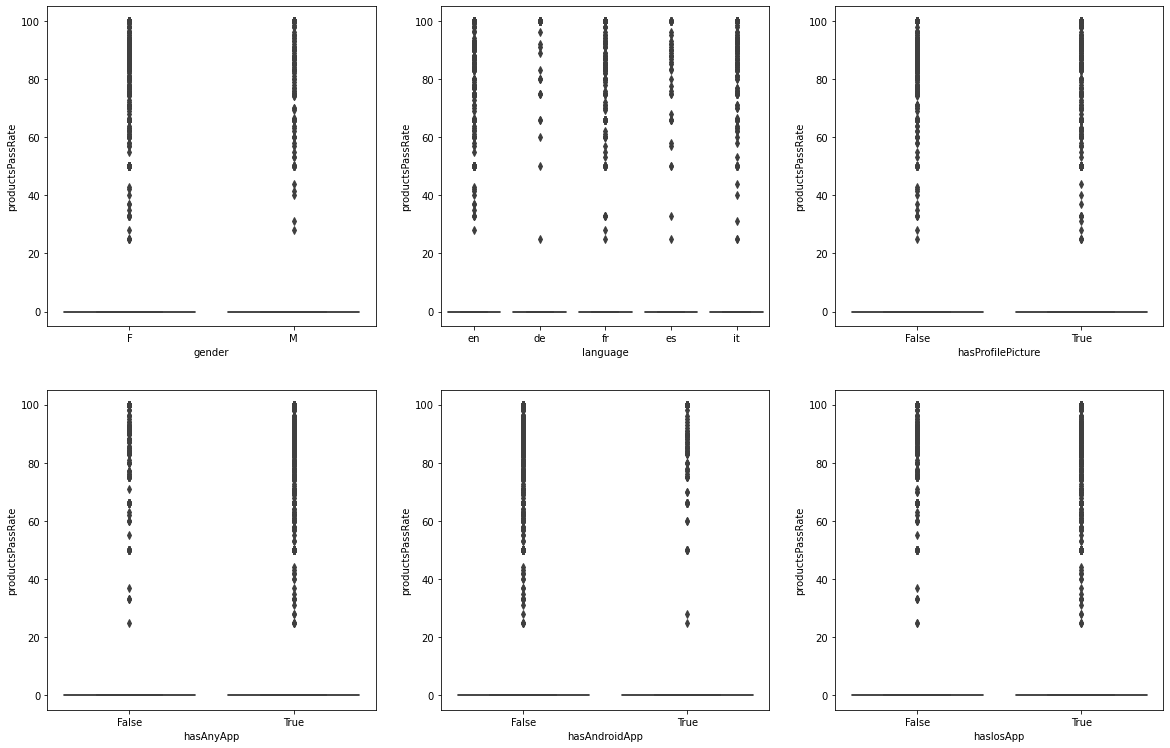

In [106]:
FIG = plt.figure(figsize=(20, 20))

FIG.add_subplot(331)
sns.boxplot(x='gender', y='productsPassRate', data=test)

FIG.add_subplot(332)
sns.boxplot(x='language', y='productsPassRate', data=test)

FIG.add_subplot(333)
sns.boxplot(x='hasProfilePicture', y='productsPassRate', data=test)

FIG.add_subplot(334)
sns.boxplot(x='hasAnyApp', y='productsPassRate', data=test)

FIG.add_subplot(335)
sns.boxplot(x='hasAndroidApp', y='productsPassRate', data=test)

FIG.add_subplot(336)
sns.boxplot(x='hasIosApp', y='productsPassRate', data=test)

plt.show()

In [30]:
# 'socialNbFollowers','socialNbFollows','socialProductsLiked','productsListed','productsSold','productsPassRate','productsWished','productsBought'
# 'daysSinceLastLogin','seniority','seniorityAsMonths','seniorityAsYears'

# country
# language
# gender
# hasAnyApp
# hasAndroidApp
# hasIosApp
# hasProfilePicture

In [103]:
df_clean = test.copy()
df_clean.loc[df_clean['productsBought'] > 0 , 'buyer'] = 1
df_clean.loc[df_clean['productsSold'] > 0 , 'seller'] = 1
df_clean['buyer'] = df_clean['buyer'].replace(np.nan,0).apply(int)
df_clean['seller'] = df_clean['seller'].replace(np.nan,0).apply(int)

def cond_neither(df):
    if (df['buyer'] == 0) and (df['seller'] == 0):
        return 1
    else:
        return 0

def cond_both(df):
    if (df['buyer'] == 1) and (df['seller'] == 1):
        return 1
    else:
        return 0

df_clean['neither'] = df_clean.apply(cond_neither, axis=1)
df_clean['both'] = df_clean.apply(cond_both, axis=1)

df_clean = df_clean[df_clean['neither'] == 0]
df_clean = df_clean.drop(columns=['neither'])                                                                                                               
df_clean.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,buyer,seller,both
46,-1369438276320193587,user,France,fr,31,8,0,1,1,0.0,0,1,F,2,mrs,True,False,True,False,127,3205,106.83,8.9,fr,1,1,1
51,-6589093921826008799,user,Etats-Unis,en,3,9,1,0,0,0.0,14,1,M,1,mr,False,False,False,True,26,3205,106.83,8.9,us,1,0,0
85,-937288556484695351,user,Suède,en,5,8,0,0,0,0.0,107,1,M,1,mr,False,False,False,True,543,3205,106.83,8.9,se,1,0,0
95,7144186809315241123,user,Canada,en,4,10,1,0,0,0.0,7,1,F,2,mrs,True,True,False,True,208,3205,106.83,8.9,ca,1,0,0
102,4994268169579335625,user,Royaume-Uni,en,3,8,0,0,0,0.0,0,2,F,2,mrs,False,False,False,True,27,3205,106.83,8.9,gb,1,0,0


In [105]:
df_clean.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,buyer,seller,both
count,6.893000e+03,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000
mean,-1.191618e+16,6.777455,13.540984,44.318004,1.210213,1.744814,11.656362,16.170318,2.467141,1.758451,277.020310,3067.008704,102.233501,8.519418,0.786160,0.295372,0.081532
std,5.307866e+18,13.910473,200.094334,681.880940,7.646123,7.879719,30.175166,90.304701,8.508947,0.481645,266.095413,167.619338,5.587133,0.465919,0.410045,0.456243,0.273670
min,-9.221801e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000,0.000000,0.000000,0.000000
25%,-4.562964e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,22.000000,2857.000000,95.230000,7.940000,1.000000,0.000000,0.000000
50%,5.480978e+15,4.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,179.000000,3197.000000,106.570000,8.880000,1.000000,0.000000,0.000000
75%,4.488304e+18,6.000000,8.000000,12.000000,0.000000,1.000000,0.000000,4.000000,2.000000,2.000000,566.000000,3201.000000,106.700000,8.890000,1.000000,1.000000,0.000000
max,9.221188e+18,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,709.000000,3205.000000,106.830000,8.900000,1.000000,1.000000,1.000000


C:\Users\Mattheus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mattheus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mattheus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

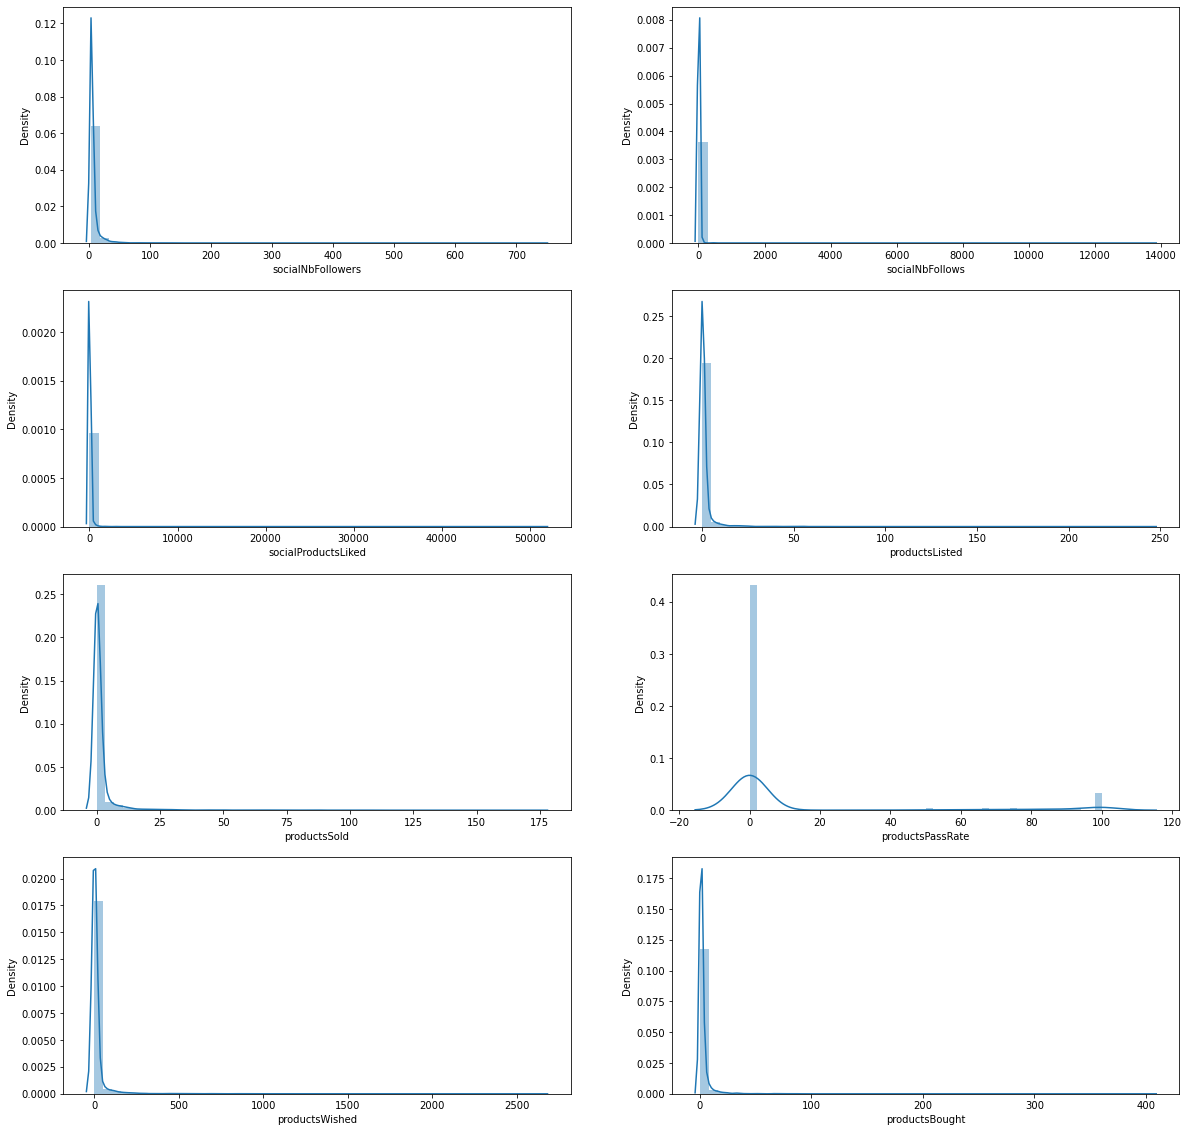

In [104]:
FIG = plt.figure(figsize=(20, 20))

FIG.add_subplot(421)
sns.distplot(df_clean['socialNbFollowers'])

FIG.add_subplot(422)
sns.distplot(df_clean['socialNbFollows'])

FIG.add_subplot(423)
sns.distplot(df_clean['socialProductsLiked'])

FIG.add_subplot(424)
sns.distplot(df_clean['productsListed'])

FIG.add_subplot(425)
sns.distplot(df_clean['productsSold'])

FIG.add_subplot(426)
sns.distplot(df_clean['productsPassRate'])

FIG.add_subplot(427)
sns.distplot(df_clean['productsWished'])

FIG.add_subplot(428)
sns.distplot(df_clean['productsBought'])

plt.show()

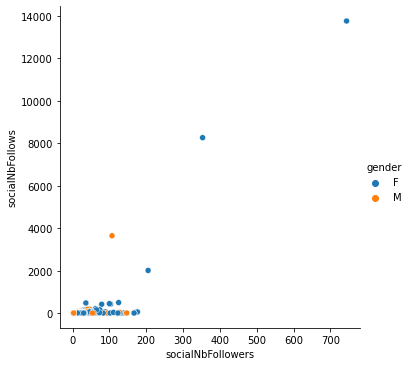

In [32]:
sns.relplot(x='socialNbFollowers', y='socialNbFollows', hue='gender', data=df)

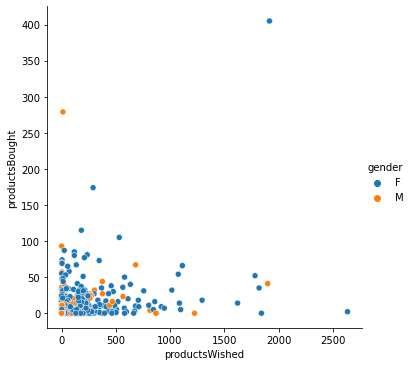

In [33]:
sns.relplot(x='productsWished', y='productsBought', hue='gender', data=df)